# Analysis of Starting & Ending Trip Events

Here we're doing analysis and visualization on trips from 01/01/2018-01/01/2019. There are 156,602 Start or End bike events. By the end of this notebook, we have determined how bike 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from datetime import datetime
df = pd.read_csv('../data/mbike_NamedStations_StartEndOnly.csv', index_col=0)

print(str(len(df.index)) + " Starting/Ending trip bike events.")
print(str(len(df.Coords_Latitude.unique())) + " unique Latitude Coordinates.")
print(str(len(df.Coords_Longitude.unique())) + " unique Longitude Coordinates.")

156602 Starting/Ending trip bike events.
24 unique Latitude Coordinates.
24 unique Longitude Coordinates.


#### Date_time column converted to a python datetime object, then get the day of the week this corresponds to.  
#### Then split the datsaset into weekdays & weekdays.

In [3]:
def fixDateTime(row):
    s = row['Date_Time'].split("T")
    t = s[1].split(".")[0]
    date = s[0]
    datetime = date +" " + t
    #print(date)
    return pd.Series([datetime])

df[['Date_Time']] = df.apply(fixDateTime, axis=1)
df['Date_Time'] = pd.to_datetime(df['Date_Time'], errors='coerce')
df['Day'] = pd.to_datetime(df['Date_Time']).dt.dayofweek
df.head(1)

,Coords_Latitude,Coords_Longitude,Trip_ID,Bike_Event,User_ID,Date_Time,Date,Time,StationName,Day
0,38.978129,-76.929079,Hf3aj78RcGaJJMGRn,StartTrip,24Tswou857XKT9R65,2017-06-14 19:02:21,2017-06-14,19:02:21,College Park Metro West,2


In [4]:
len(df.index)

156602

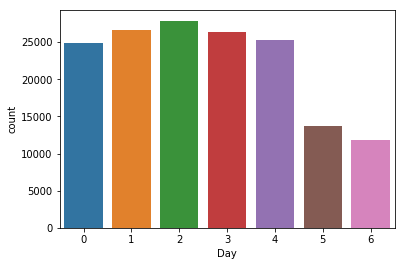

In [5]:
sns.countplot(x="Day", data= df)

__*Distribution of usage by day. 0 corresponds to Monday, 6 corresponds to Sunday.*__

## User_ID counts
Looks like most users will only take 25-50 trips

/home/luc/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 400)

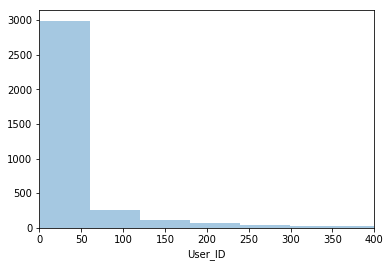

In [6]:
sns.distplot(df['User_ID'].value_counts()[:], norm_hist=False, kde=False)
plt.xlim(0,400)

In [7]:
df.head().Date_Time.dt.dayofweek

0    2
1    3
2    3
3    5
4    5
Name: Date_Time, dtype: int64

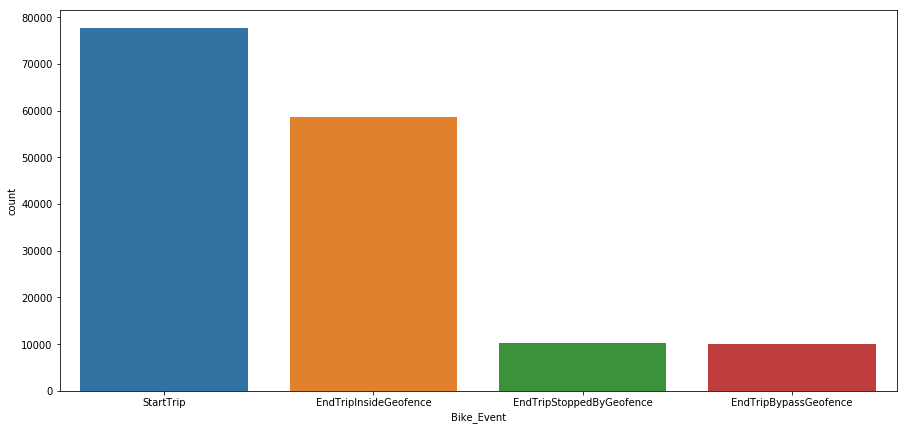

In [8]:
plt.rcParams['figure.figsize'] = [15, 7]
sns.countplot(df.Bike_Event)

In [9]:
df.Bike_Event.value_counts()

StartTrip                   77600
EndTripInsideGeofence       58665
EndTripStoppedByGeofence    10357
EndTripBypassGeofence        9980
Name: Bike_Event, dtype: int64

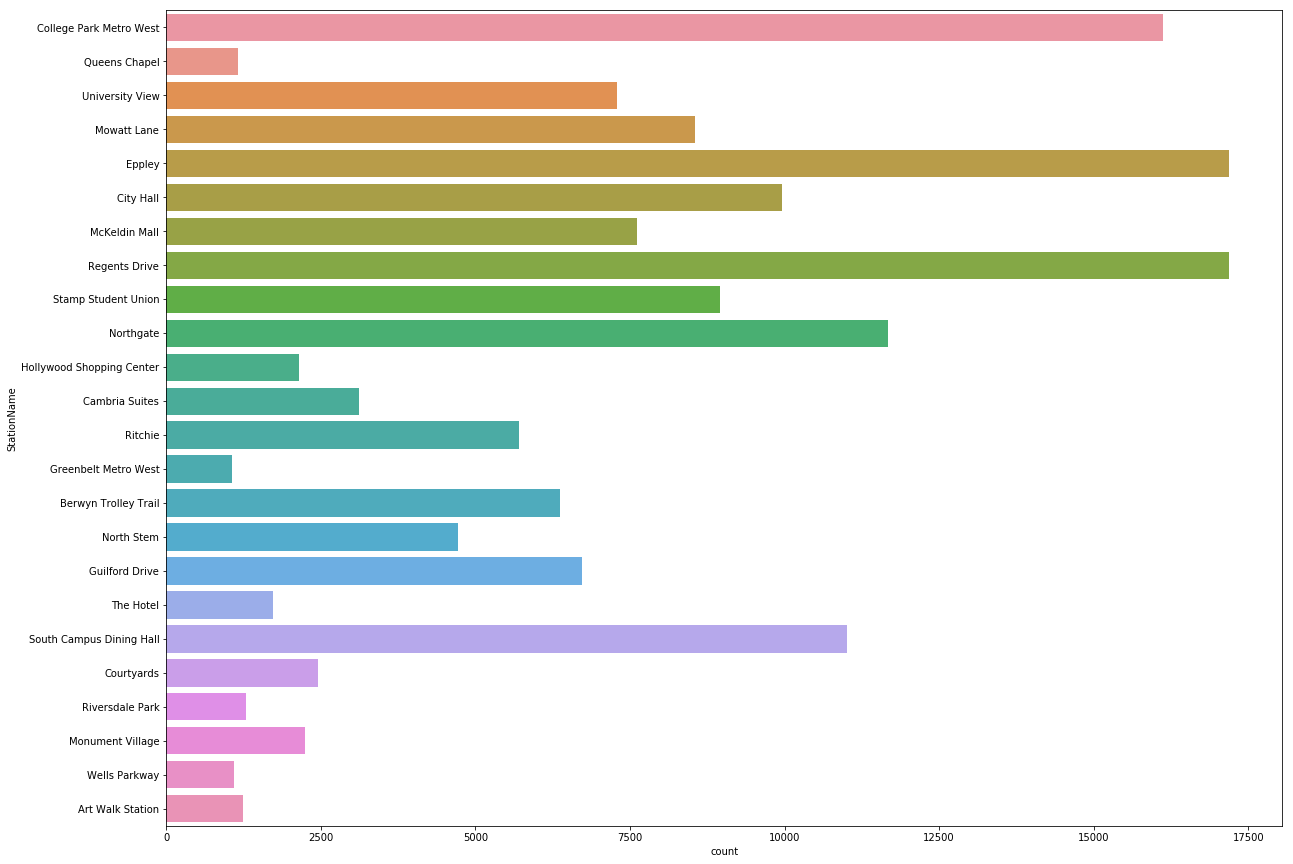

In [10]:
plt.rcParams['figure.figsize'] = [20, 15]
ax = sns.countplot(y="StationName", data=df)

In [11]:
dfStation = pd.read_csv('../data/stationsInfo.csv')
dfStation.head(3)

,Name,Altitude,Longitude,Latitude
0,Hollywood Shopping Center,42,-76.921340,39.013710
1,Greenbelt Metro West,30,-76.913859,39.010546
2,Monument Village,40,-76.930522,39.004601


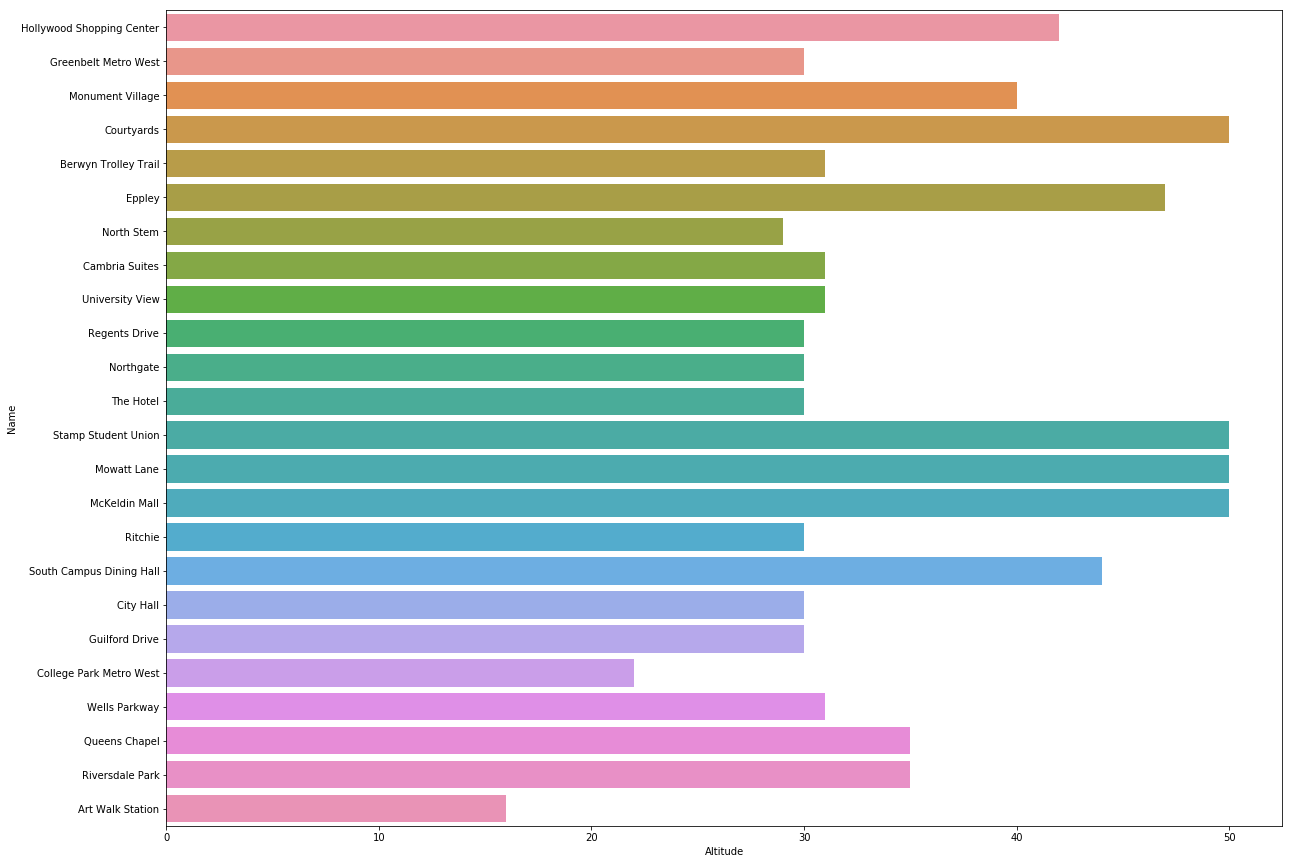

In [12]:
#sns.countplot(y="StationName")
ax = sns.barplot(y="Name", x="Altitude", data=dfStation)

In [13]:
df.head(5)

,Coords_Latitude,Coords_Longitude,Trip_ID,Bike_Event,User_ID,Date_Time,Date,Time,StationName,Day
0,38.978129,-76.929079,Hf3aj78RcGaJJMGRn,StartTrip,24Tswou857XKT9R65,2017-06-14 19:02:21,2017-06-14,19:02:21,College Park Metro West,2
1,38.978129,-76.929079,tp7QKuiJX9DvLKDcf,StartTrip,24Tswou857XKT9R65,2017-06-15 20:07:14,2017-06-15,20:07:14,College Park Metro West,3
2,38.972794,-76.938213,tp7QKuiJX9DvLKDcf,EndTripInsideGeofence,24Tswou857XKT9R65,2017-06-15 20:19:43,2017-06-15,20:19:43,Queens Chapel,3
3,38.978129,-76.929079,j7xEWoy65rDsJfk7M,StartTrip,24Tswou857XKT9R65,2017-06-17 22:25:55,2017-06-17,22:25:55,College Park Metro West,5
4,38.972794,-76.938213,j7xEWoy65rDsJfk7M,EndTripInsideGeofence,24Tswou857XKT9R65,2017-06-17 22:36:07,2017-06-17,22:36:07,Queens Chapel,5


In [14]:
#Original length of start+end trip events (~156000)
df = df[df['Date_Time'] > datetime(2018,1,1)] #After 01/2018 had 23 stations!!!!
print(len(df.index)) # 104031

113964


In [15]:
# Split into Start/Ends
# keep only if after 03/2018 ******
dfStart = df[df["Bike_Event"] == 'StartTrip'] # 56479
dfEnd = df[df["Bike_Event"]!= 'StartTrip']  # 57485,
# So, -723 (More ends than starts). Weight for ends:
print(len(dfStart.index)/len(dfEnd.index))
print(len(dfStart.index))
print(len(dfEnd.index))

weight = len(dfStart.index)/len(dfEnd.index)
dfStart.head(2)

0.9824997825519701
56479
57485


,Coords_Latitude,Coords_Longitude,Trip_ID,Bike_Event,User_ID,Date_Time,Date,Time,StationName,Day
222,38.985199,-76.942699,79wA5iaNpfvyug2yW,StartTrip,26qA87mpcaQQhG37beEnELBw,2018-01-29 22:31:27,2018-01-29,22:31:27,McKeldin Mall,0
3289,38.978129,-76.929079,ejjmjSNr54JWH9max,StartTrip,292B39TcJhzNwQuDf,2018-04-24 12:01:19,2018-04-24,12:01:19,College Park Metro West,1


In [16]:
#How correlated is altitude to usage?

dfPlot = pd.DataFrame(dfStart.StationName.value_counts())#Returns a series in descending order, converts to df
dfPlot1 = pd.DataFrame(dfEnd.StationName.value_counts())
dfPlot.columns = ['StartFreq']
dfPlot1.columns = ['EndFreq']

dfmergeS = dfStation.join(dfPlot, on='Name')
# dfmergeSE consists of has staion info + the number of start and end trips.
dfmergeSE = dfmergeS.join(dfPlot1, on='Name')
dfmergeSE['Diff'] = dfmergeSE['StartFreq']-dfmergeSE['EndFreq']
dfmergeSE['Total'] = dfmergeSE['StartFreq']+dfmergeSE['EndFreq']

In [17]:
dfmergeSE.Diff.sum()
dfmergeSE.head(5)

,Name,Altitude,Longitude,Latitude,StartFreq,EndFreq,Diff,Total
0,Hollywood Shopping Center,42,-76.921340,39.013710,845,871,-26,1716
1,Greenbelt Metro West,30,-76.913859,39.010546,414,444,-30,858
2,Monument Village,40,-76.930522,39.004601,950,726,224,1676
3,Courtyards,50,-76.942093,39.002302,787,802,-15,1589
4,Berwyn Trolley Trail,31,-76.926618,38.994689,2171,2150,21,4321


In [18]:
dfmergeSE['Diff_Norm'] = dfmergeSE['StartFreq']-weight*dfmergeSE['EndFreq']
dfmergeSE.Diff_Norm.sum()

-3.183231456205249e-12

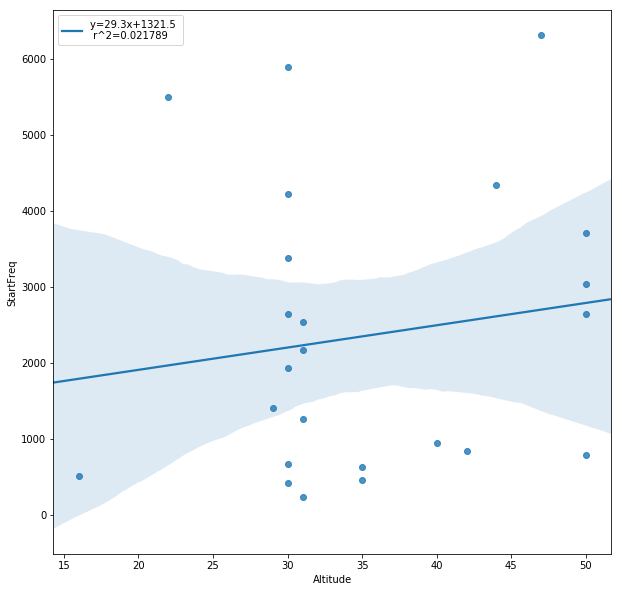

In [19]:
#sns.lmplot(x='Altitude', y='StartFreq', data=dfmergeSE)
from scipy import stats
# Use scipy.stats to get the linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(dfmergeSE['Altitude'],dfmergeSE['StartFreq'])

# Pass parameters of fit using line_kws for legend
ax = sns.regplot(x="Altitude", y="StartFreq", data=dfmergeSE, 
 line_kws={'label':"y={0:.1f}x+{1:.1f} \n r^2={2:f}".format(slope,intercept,r_value**2)})
ax.figure.set_size_inches(10, 10)
ax.legend()
plt.show()

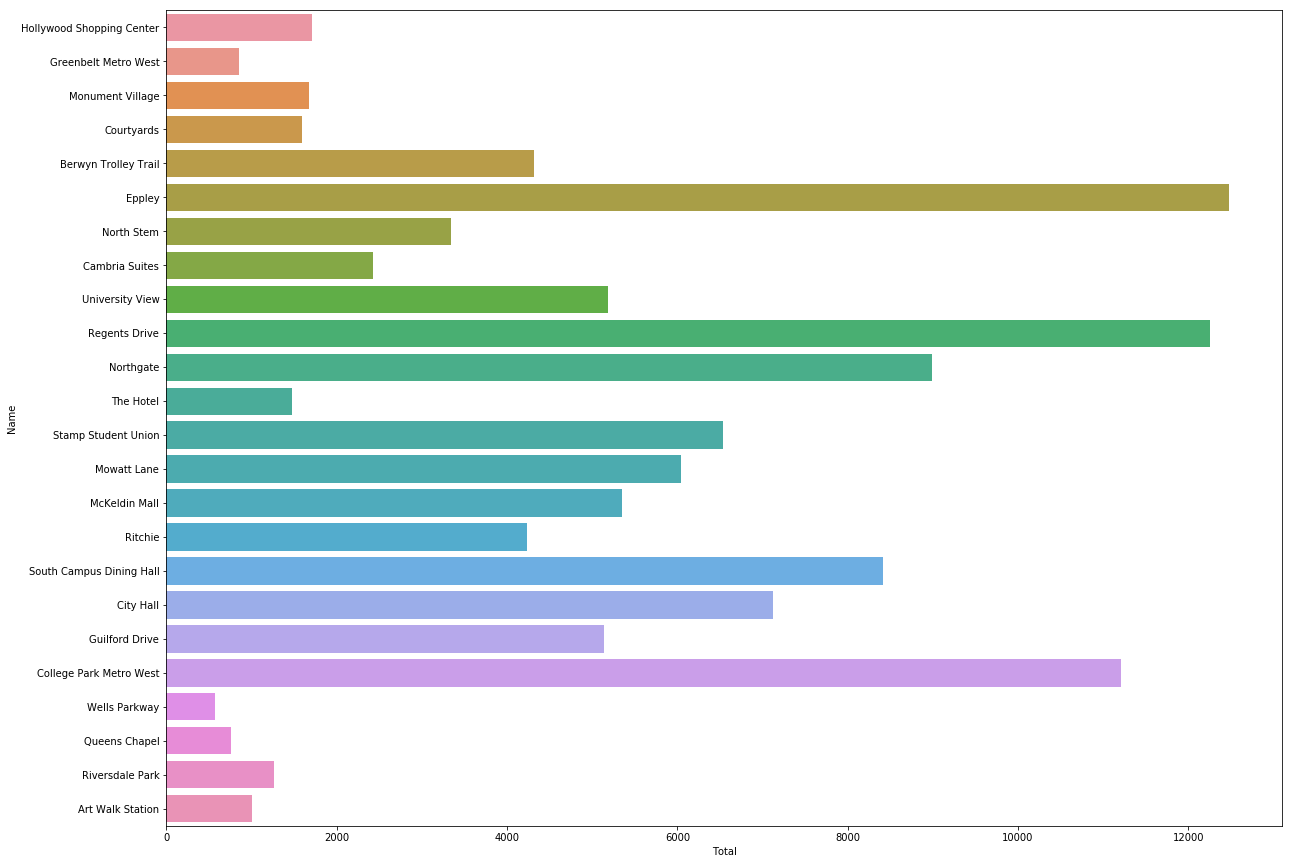

In [20]:
#ax = sns.barplot(y="Name", x="Diff_Norm", data=dfmergeSE[dfmergeSE['Diff_Norm'] < 0])
#ax = sns.barplot(y="Name", x="Diff_Norm", data=dfmergeSE)
ax = sns.barplot(y="Name", x="Total", data=dfmergeSE)

# Make maps of stations where the size of their bubble marker represents usage. 

In [21]:
dfmergeSE.head(5)

,Name,Altitude,Longitude,Latitude,StartFreq,EndFreq,Diff,Total,Diff_Norm
0,Hollywood Shopping Center,42,-76.921340,39.013710,845,871,-26,1716,-10.757311
1,Greenbelt Metro West,30,-76.913859,39.010546,414,444,-30,858,-22.229903
2,Monument Village,40,-76.930522,39.004601,950,726,224,1676,236.705158
3,Courtyards,50,-76.942093,39.002302,787,802,-15,1589,-0.964826
4,Berwyn Trolley Trail,31,-76.926618,38.994689,2171,2150,21,4321,58.625468


In [22]:
dfmergeSE.head(5)
#dfmergeSE.to_csv("stationsInfo_TripCounts.csv")

,Name,Altitude,Longitude,Latitude,StartFreq,EndFreq,Diff,Total,Diff_Norm
0,Hollywood Shopping Center,42,-76.921340,39.013710,845,871,-26,1716,-10.757311
1,Greenbelt Metro West,30,-76.913859,39.010546,414,444,-30,858,-22.229903
2,Monument Village,40,-76.930522,39.004601,950,726,224,1676,236.705158
3,Courtyards,50,-76.942093,39.002302,787,802,-15,1589,-0.964826
4,Berwyn Trolley Trail,31,-76.926618,38.994689,2171,2150,21,4321,58.625468


In [23]:
#Make a map over all time of Net_Norm (StartTrips-weight*EndTrips)
import folium
m = folium.Map(location=[dfmergeSE['Latitude'].mean(),dfmergeSE['Longitude'].mean()], zoom_start=14)

# Green means more bike trips started than ended, Blue means more ended than started
for i in range(0,len(dfmergeSE)):
    net_norm = dfmergeSE.iloc[i]['Diff_Norm']
    if (net_norm>0): 
        c ='green'
    else: 
        c = 'blue' 

    folium.Circle(
      location=[dfmergeSE.iloc[i]['Latitude'], dfmergeSE.iloc[i]['Longitude']],
      popup=dfmergeSE.iloc[i]['Name'],
      radius=abs(net_norm)*(0.15),
      color=c,
      fill=True,
      fill_color=c
   ).add_to(m)
#m
#Make a map over all time of usage
m2 = folium.Map(location=[dfmergeSE['Latitude'].mean(),dfmergeSE['Longitude'].mean()], zoom_start=14)

#Size of circle denotes usage frequency of station
for i in range(0,len(dfmergeSE)):
    sumF = dfmergeSE.iloc[i]['StartFreq'] + dfmergeSE.iloc[i]['EndFreq']
    c ='crimson'
    folium.Circle(
      location=[dfmergeSE.iloc[i]['Latitude'], dfmergeSE.iloc[i]['Longitude']],
      popup=dfmergeSE.iloc[i]['Name'],
      radius=abs(sumF)*(0.015),
      color=c,
      fill=True,
      fill_color=c
   ).add_to(m2)
m2

In [24]:
m2.save('totalUsage_01-2018_map.html')
m.save('mapOfBikeODs_01_2018.html')

AttributeError: 'JointGrid' object has no attribute 'figure'

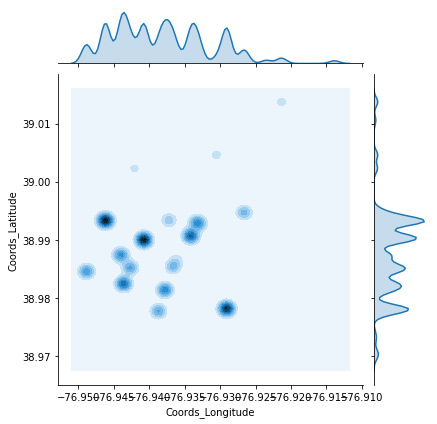

In [25]:
g = sns.jointplot("Coords_Longitude", "Coords_Latitude", kind='kde', data=df)#,joint_kws=dict(gridsize=35))
#g.figure.set_size_inches(10, 10)

In [26]:
#ax = sns.relplot(x="Longitude", y="Latitude", hue="Net_Norm", data=dfmergeSE);

# Transform data into a table of Completed Routes
(This has Trip_ID,User_ID,Start_Station,End_Station,Start_Time,End_Time, etc)

In [27]:
dfS = dfStart.set_index("Trip_ID")
dfE = dfEnd.set_index("Trip_ID")
dfS.head(3)
dfE.head(3)

,Coords_Latitude,Coords_Longitude,Bike_Event,User_ID,Date_Time,Date,Time,StationName,Day
Trip_ID,,,,,,,,,
79wA5iaNpfvyug2yW,38.985199,-76.942699,EndTripInsideGeofence,26qA87mpcaQQhG37beEnELBw,2018-01-29 22:32:22,2018-01-29,22:32:22,McKeldin Mall,0
cvaLjh9vKtcdeQhrM,38.989979,-76.940757,EndTripInsideGeofence,292B39TcJhzNwQuDf,2018-04-23 13:06:02,2018-04-23,13:06:02,Regents Drive,0
qpZpMNkiJkJ4vmBpB,38.978129,-76.929079,EndTripInsideGeofence,292B39TcJhzNwQuDf,2018-04-25 20:51:46,2018-04-25,20:51:46,College Park Metro West,2


In [28]:
#Join on trip ID, keep coords
#Use dfStart, dfEnd. For each trip_ID, get start & end info Lat/Long and station.
dfTrips = dfS.join(dfE, lsuffix='_S', rsuffix='_E')

#Column format:
'''['Coords_Latitude_S', 'Coords_Longitude_S', 'Bike_Event_S', 'User_ID_S',
       'Date_Time_S', 'Date_S', 'Time_S', 'StationName_S', 'Day_S',
       'Coords_Latitude_E', 'Coords_Longitude_E', 'Bike_Event_E', 'User_ID_E',
       'Date_Time_E', 'Date_E', 'Time_E', 'StationName_E', 'Day_E']'''

"['Coords_Latitude_S', 'Coords_Longitude_S', 'Bike_Event_S', 'User_ID_S',\n       'Date_Time_S', 'Date_S', 'Time_S', 'StationName_S', 'Day_S',\n       'Coords_Latitude_E', 'Coords_Longitude_E', 'Bike_Event_E', 'User_ID_E',\n       'Date_Time_E', 'Date_E', 'Time_E', 'StationName_E', 'Day_E']"

## Distribution of Trip duration
- 96.5% are under 60 minutes
- 99.3% of trips are under 200 minutes

In [29]:
#Let's look at duration of trips
def durInMinutes(row):
    t_E= row['Date_Time_E'] 
    t_S = row['Date_Time_S']
    dur = (t_E - t_S).seconds
    dur = round(dur/60,2)
    return pd.Series([dur])
dfTrips.head(5)
print(dfTrips)

dfCompleteTrips = dfTrips.dropna(subset=['StationName_S', 'StationName_E']) #Remove incomplete trips!
dfCompleteTrips['Duration'] = dfCompleteTrips.apply(durInMinutes, axis=1)
# print(len(dfTrips.index)) print(len(dfCompleteTrips.index))
# duration = (after - before) // timedelta(seconds=3600)
print(str((len(dfCompleteTrips.index)/(len(dfTrips.index)))*100) + "% of trips were completed. Rest were missing start or end event.")
dfCompleteTrips.head(5)

                          Coords_Latitude_S  Coords_Longitude_S Bike_Event_S  \
Trip_ID                                                                        
224m5sDwixLcZAtHY                 38.989979          -76.940757    StartTrip   
229w9YBqSsH8GLiDqB3vREit          38.984549          -76.948848    StartTrip   
22A97tQpvoZWzsjs4                 38.977703          -76.938708    StartTrip   
22J2Z6Rs7ZtsF4xBR                 38.981365          -76.937776    StartTrip   
22Ld6zu6nzqRdSTNs                 38.994689          -76.926618    StartTrip   
22Yr5G8KH89rx9B5FF8TfAen          39.002302          -76.942093    StartTrip   
22aMeKuq96FB65o29                 38.993316          -76.946189    StartTrip   
22b4BN2j9qnpX7mav                 38.985199          -76.942699    StartTrip   
22b5nytLWJzKNuBTDDm7Lsk7          38.992959          -76.933312    StartTrip   
22f4oxL6AR7v2nprvkMAsyhv          38.989979          -76.940757    StartTrip   
22f4oxL6AR7v2nprvkMAsyhv          38.989

86.48069991682327% of trips were completed. Rest were missing start or end event.


/home/luc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,Coords_Latitude_S,Coords_Longitude_S,Bike_Event_S,User_ID_S,Date_Time_S,Date_S,Time_S,StationName_S,Day_S,Coords_Latitude_E,Coords_Longitude_E,Bike_Event_E,User_ID_E,Date_Time_E,Date_E,Time_E,StationName_E,Day_E,Duration
Trip_ID,,,,,,,,,,,,,,,,,,,
224m5sDwixLcZAtHY,38.989979,-76.940757,StartTrip,rnSbW8bM7sEPi4Zo7mxpcxpW,2018-03-09 12:34:49,2018-03-09,12:34:49,Regents Drive,4,38.969811,-76.923467,EndTripInsideGeofence,rnSbW8bM7sEPi4Zo7mxpcxpW,2018-03-09 12:48:15,2018-03-09,12:48:15,Art Walk Station,4.0,13.43
229w9YBqSsH8GLiDqB3vREit,38.984549,-76.948848,StartTrip,N2duvRsnp8qbGDE9j,2018-12-05 02:26:10,2018-12-05,02:26:10,Mowatt Lane,2,38.981365,-76.937776,EndTripInsideGeofence,N2duvRsnp8qbGDE9j,2018-12-05 02:33:47,2018-12-05,02:33:47,City Hall,2.0,7.62
22A97tQpvoZWzsjs4,38.977703,-76.938708,StartTrip,iEmvgTPzoWvqEXf2w,2018-03-09 13:06:39,2018-03-09,13:06:39,Guilford Drive,4,38.978129,-76.929079,EndTripInsideGeofence,iEmvgTPzoWvqEXf2w,2018-03-09 13:11:15,2018-03-09,13:11:15,College Park Metro West,4.0,4.60
22Ld6zu6nzqRdSTNs,38.994689,-76.926618,StartTrip,ZQbLrsCivffAR5SKo,2018-06-09 16:18:35,2018-06-09,16:18:35,Berwyn Trolley Trail,5,38.993316,-76.946189,EndTripInsideGeofence,ZQbLrsCivffAR5SKo,2018-06-09 16:28:27,2018-06-09,16:28:27,Eppley,5.0,9.87
22Yr5G8KH89rx9B5FF8TfAen,39.002302,-76.942093,StartTrip,5jfC3BBByT92N9srTYtt8ir8,2018-10-02 23:12:02,2018-10-02,23:12:02,Courtyards,1,38.982425,-76.943613,EndTripInsideGeofence,5jfC3BBByT92N9srTYtt8ir8,2018-10-02 23:32:30,2018-10-02,23:32:30,South Campus Dining Hall,1.0,20.47


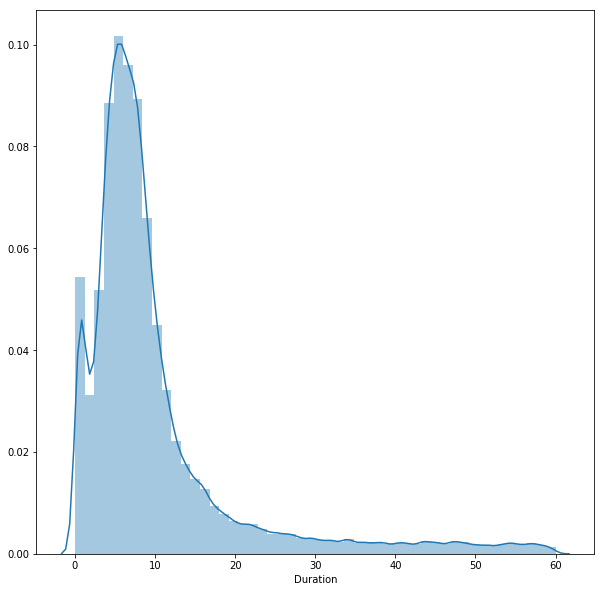

In [30]:
plt.rcParams['figure.figsize'] = [10, 10]
sns.distplot(dfCompleteTrips[dfCompleteTrips["Duration"] <= 60].Duration)


#sns.distplot(dfCompleteTrips[dfCompleteTrips.Duration)
#print(len(dfCompleteTrips[dfCompleteTrips["Duration"] <= 20].index)/len(dfCompleteTrips.index))
#print(len(dfCompleteTrips[dfCompleteTrips["Duration"] <= 200].index)/len(dfCompleteTrips.index))
#print(dfCompleteTrips.Duration.describe())

In [31]:
dfCompleteTrips.to_csv('transformedData/CompletedMBikeTrips.csv',index='False')
eppley = dfCompleteTrips[(dfCompleteTrips['StationName_S'] == 'Eppley') & (dfCompleteTrips['StationName_E'] == 'Eppley')]

In [32]:
eppley.head(3)

,Coords_Latitude_S,Coords_Longitude_S,Bike_Event_S,User_ID_S,Date_Time_S,Date_S,Time_S,StationName_S,Day_S,Coords_Latitude_E,Coords_Longitude_E,Bike_Event_E,User_ID_E,Date_Time_E,Date_E,Time_E,StationName_E,Day_E,Duration
Trip_ID,,,,,,,,,,,,,,,,,,,
27CsexfY7F3cr82nb,38.993316,-76.946189,StartTrip,G8nAk7vmo2sz6qyJa54GBDqG,2018-08-29 22:26:55,2018-08-29,22:26:55,Eppley,2,38.993316,-76.946189,EndTripInsideGeofence,G8nAk7vmo2sz6qyJa54GBDqG,2018-08-29 22:28:53,2018-08-29,22:28:53,Eppley,2.0,1.97
27Fj3vyLzynRsMtSmh3pxJHv,38.993316,-76.946189,StartTrip,p4BjatWGAswMAHgKrQc6iMXt,2018-11-01 16:20:30,2018-11-01,16:20:30,Eppley,3,38.993316,-76.946189,EndTripStoppedByGeofence,p4BjatWGAswMAHgKrQc6iMXt,2018-11-01 16:22:42,2018-11-01,16:22:42,Eppley,3.0,2.20
27Fj3vyLzynRsMtSmh3pxJHv,38.993316,-76.946189,StartTrip,p4BjatWGAswMAHgKrQc6iMXt,2018-11-01 16:20:30,2018-11-01,16:20:30,Eppley,3,38.993316,-76.946189,EndTripBypassGeofence,p4BjatWGAswMAHgKrQc6iMXt,2018-11-01 16:22:43,2018-11-01,16:22:43,Eppley,3.0,2.22


In [43]:
#Count number of times each route is taken!
count_series = dfCompleteTrips.groupby(['StationName_S', 'StationName_E']).size()
dfRoutes = count_series.to_frame(name = 'Frequency').reset_index()
dfRoutes.to_csv("transformedData/routeFrequency.csv",index=False)
dfRoutes.sort_values(by=['Frequency'], ascending=False).head()

,StationName_S,StationName_E,Frequency
135,Eppley,Eppley,1503
364,Regents Drive,Regents Drive,1101
318,Northgate,Northgate,918
173,Guilford Drive,College Park Metro West,829
421,South Campus Dining Hall,College Park Metro West,769


In [34]:
dfCompleteTrips.head(3)

,Coords_Latitude_S,Coords_Longitude_S,Bike_Event_S,User_ID_S,Date_Time_S,Date_S,Time_S,StationName_S,Day_S,Coords_Latitude_E,Coords_Longitude_E,Bike_Event_E,User_ID_E,Date_Time_E,Date_E,Time_E,StationName_E,Day_E,Duration
Trip_ID,,,,,,,,,,,,,,,,,,,
224m5sDwixLcZAtHY,38.989979,-76.940757,StartTrip,rnSbW8bM7sEPi4Zo7mxpcxpW,2018-03-09 12:34:49,2018-03-09,12:34:49,Regents Drive,4,38.969811,-76.923467,EndTripInsideGeofence,rnSbW8bM7sEPi4Zo7mxpcxpW,2018-03-09 12:48:15,2018-03-09,12:48:15,Art Walk Station,4.0,13.43
229w9YBqSsH8GLiDqB3vREit,38.984549,-76.948848,StartTrip,N2duvRsnp8qbGDE9j,2018-12-05 02:26:10,2018-12-05,02:26:10,Mowatt Lane,2,38.981365,-76.937776,EndTripInsideGeofence,N2duvRsnp8qbGDE9j,2018-12-05 02:33:47,2018-12-05,02:33:47,City Hall,2.0,7.62
22A97tQpvoZWzsjs4,38.977703,-76.938708,StartTrip,iEmvgTPzoWvqEXf2w,2018-03-09 13:06:39,2018-03-09,13:06:39,Guilford Drive,4,38.978129,-76.929079,EndTripInsideGeofence,iEmvgTPzoWvqEXf2w,2018-03-09 13:11:15,2018-03-09,13:11:15,College Park Metro West,4.0,4.60


## Weekday overall hourly bike usage (Start trips)
This data shows that bikes are rarely used for morning commutes. People are much more likely to use mBikes to commute after 12pm. This usage spikes at 9pm, and then we see that at 12am people are almost just as likely to begin a trip as at 12pm!

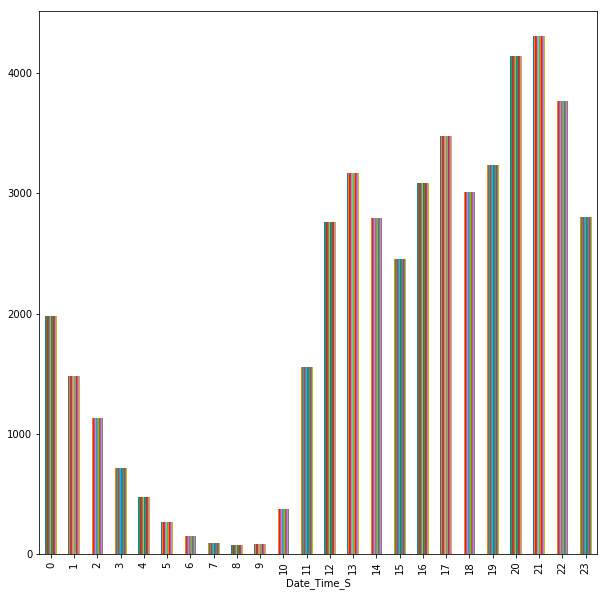

In [35]:
#Weekday plots
dfNew =dfCompleteTrips[(dfCompleteTrips['Day_S'] >= 0) & (dfCompleteTrips['Day_S'] <= 4)]
dfNew.groupby([dfNew["Date_Time_S"].dt.hour]).count().plot(kind="bar",legend=False)
#dfNew.groupby([dfNew["Date_Time_S"].dt.year, dfNew["Date_Time_S"].dt.month]).count().plot(kind="bar")

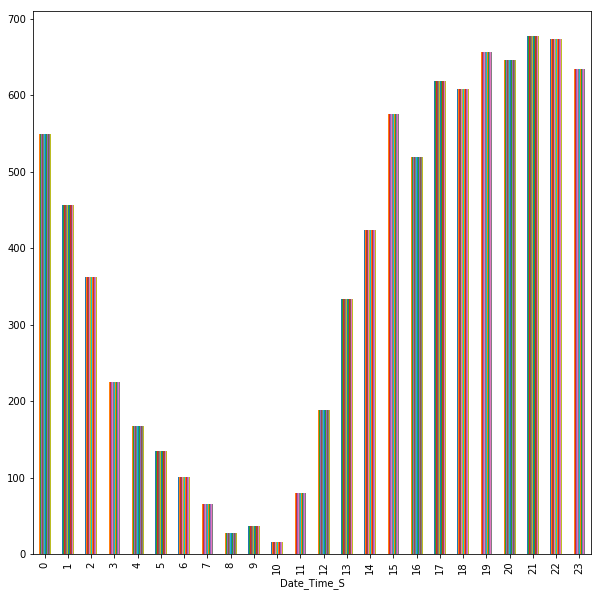

In [36]:
dfWeekend =dfCompleteTrips[(dfCompleteTrips['Day_S'] >4) & (dfCompleteTrips['Day_S'] <= 6)]
dfWeekend.groupby([dfWeekend["Date_Time_S"].dt.hour]).count().plot(kind="bar",legend=False)

## Bike load imbalances
#### Here we seek to answer the question: are there substantial bike imbalances that occur between stations? That is, will a truck have to come and rebalance bikes such that stamp has enough bikes for people to ride downhill home? 

We will see that there are clearly natural bike imbalances due to population tendenceies, and that if the bikes are not properly balanced between stations, this can quickly become a significant problem.

### Average _weekday_ bike differential by station

In [44]:
# We start with the cleaned bike data with only start and end trips.
df.head(1)

,Coords_Latitude,Coords_Longitude,Trip_ID,Bike_Event,User_ID,Date_Time,Date,Time,StationName,Day
222,38.985199,-76.942699,79wA5iaNpfvyug2yW,StartTrip,26qA87mpcaQQhG37beEnELBw,2018-01-29 22:31:27,2018-01-29,22:31:27,McKeldin Mall,0


In [38]:
dfWeekdays = df[(df["Day"] <=4) & (df["Day"]>=0)] #Weekdays
print(dfWeekdays['Date_Time'].max())
print(dfWeekdays['Date_Time'].min())

#Split into 4 dataframes, corresponding to morning, mid-day, evening and Late (4-10am,10am-4pm, 4-10pm, 10pm-4am):
dfWeekdaysM = dfWeekdays[(dfWeekdays['Date_Time'].dt.hour >= 4) & (dfWeekdays['Date_Time'].dt.hour < 10)]
dfWeekdaysMid = dfWeekdays[(dfWeekdays['Date_Time'].dt.hour >= 10) & (dfWeekdays['Date_Time'].dt.hour < 16)]
dfWeekdaysEve = dfWeekdays[(dfWeekdays['Date_Time'].dt.hour >= 16) & (dfWeekdays['Date_Time'].dt.hour < 22)]
dfWeekdaysLate = dfWeekdays[(dfWeekdays['Date_Time'].dt.hour >= 22) | (dfWeekdays['Date_Time'].dt.hour < 4) ]

#Simple function that adds a column for normalized difference bw start and ends:
def getUsage(dfByTime, periodString):
    a = dfByTime[dfByTime["Bike_Event"] == 'StartTrip'].StationName.value_counts()
    b = dfByTime[dfByTime["Bike_Event"] != 'StartTrip'].StationName.value_counts()*weight
    dfComb = pd.DataFrame(b-a)
    periodString = periodString + ' Usage'
    dfComb.columns = [periodString] # Negative means more end trips
    dfComb[periodString] = dfComb[periodString].fillna(0).astype('int64')
    return dfComb

dfCombM = getUsage(dfWeekdaysM, 'Morning')
dfCombMid = getUsage(dfWeekdaysMid, 'Mid-day')
dfCombEve = getUsage(dfWeekdaysEve, 'Evening')
dfCombLate = getUsage(dfWeekdaysLate, 'Late')

dfCombM.head(2)

2019-01-14 23:45:51
2018-01-01 00:53:31


,Morning Usage
Berwyn Trolley Trail,13
Cambria Suites,13


In [39]:
#Concat the Morning, Mid-day, Evening and Late dataframes
dfBigCat = pd.concat([dfCombM, dfCombMid, dfCombEve, dfCombLate], axis=1, join='outer')
# We are surveying 54 weeks(Monday-monday) --> 54*5 + 1 = 271 weekdays
dfCatPerWeekday = dfBigCat.div(271).round(1)
dfCatPerWeekday.head(24) #dfBigCat.head(24)

/home/luc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Morning Usage,Mid-day Usage,Evening Usage,Late Usage
Art Walk Station,NaN,0.9,-1.0,0.0
Berwyn Trolley Trail,0.0,-2.9,0.9,1.8
Cambria Suites,0.0,-0.6,0.0,0.3
City Hall,-0.1,-0.9,1.0,0.8
College Park Metro West,0.1,2.4,-1.5,-0.7
Courtyards,0.0,-0.5,0.4,0.2
Eppley,0.2,-0.7,0.6,-0.7
Greenbelt Metro West,-0.0,0.3,-0.1,-0.1
Guilford Drive,0.1,-2.9,0.9,1.5
Hollywood Shopping Center,0.1,-1.3,0.7,0.5


### Average Bike gain/loss by station per day, as well as in each section of the day

In [40]:
dfCatPerWeekday['Bike_Difference'] = dfCatPerWeekday.sum(axis = 1, skipna = True).round(2)
dfCatPerWeekday.head(24)

dfCatWdOrg = dfCatPerWeekday.iloc[(-np.abs(dfCatPerWeekday['Bike_Difference'].values)).argsort()]
dfCatWdOrg.head(10)


,Morning Usage,Mid-day Usage,Evening Usage,Late Usage,Bike_Difference
Stamp Student Union,-0.1,0.6,-2.7,-1.0,-3.2
Northgate,0.1,0.8,1.2,-0.2,1.9
North Stem,-0.1,1.0,0.9,0.0,1.8
Regents Drive,0.1,4.1,-0.6,-2.0,1.6
South Campus Dining Hall,-0.0,-1.1,-0.6,0.5,-1.2
Ritchie,0.1,0.1,0.7,0.2,1.1
Monument Village,0.0,-1.2,-0.1,0.5,-0.8
City Hall,-0.1,-0.9,1.0,0.8,0.8
Eppley,0.2,-0.7,0.6,-0.7,-0.6
University View,-0.0,-0.9,0.6,0.8,0.5


In [41]:
dfCatWdOrg.head(24)
dfCatWdOrg.Bike_Difference.sum()

1.3999999999999997

### What about during the busiest times?
We'll look at week of Sept 3- Sept 9th 2018. 2282 Trips (started) in that week alone!

In [46]:
dfBusy = df[(df['Date_Time'] < datetime(2018,9,10)) & (df['Date_Time'] >= datetime(2018,9,3))] #After 01/2018 had 23 stations!!!!
print(len(dfBusy[dfBusy['Bike_Event'] == 'StartTrip'].index))

2282


In [47]:
#dfBusy = df[(df['Date_Time'] < datetime(2018,9,10)) & (df['Date_Time'] >= datetime(2018,9,3))] #After 01/2018 had 23 stations!!!!

dfBusy = df[(df['Date_Time'] < datetime(2018,9,3)) & (df['Date_Time'] >= datetime(2018,8,27))] #After 01/2018 had 23 stations!!!!
#dfBusy = df[(df['Date_Time'] < datetime(2018,10,8)) & (df['Date_Time'] >= datetime(2018,10,1))] #After 01/2018 had 23 stations!!!!

dfWeekdaysB = dfBusy[(dfBusy["Day"] <=4) & (dfBusy["Day"]>=0)]
print(dfWeekdaysB['Date_Time'].max())
print(dfWeekdaysB['Date_Time'].min())

#Split into 4 dataframes, corresponding to morning, mid-day, evening and Late:

# !This should be a function!
# ****************************
#Split into four periods (4-10am,10-16pm,16-22pm and 4-22pm)
dfWeekdaysMB = dfWeekdaysB[(dfWeekdaysB['Date_Time'].dt.hour >= 4) & (dfWeekdaysB['Date_Time'].dt.hour < 10)]
dfWeekdaysMidB = dfWeekdaysB[(dfWeekdaysB['Date_Time'].dt.hour >= 10) & (dfWeekdaysB['Date_Time'].dt.hour < 16)]
dfWeekdaysEveB = dfWeekdaysB[(dfWeekdaysB['Date_Time'].dt.hour >= 16) & (dfWeekdaysB['Date_Time'].dt.hour < 22)]
dfWeekdaysLateB = dfWeekdaysB[(dfWeekdaysB['Date_Time'].dt.hour >= 22) | (dfWeekdaysB['Date_Time'].dt.hour < 4) ]

dfCombMB = getUsage(dfWeekdaysMB, 'Morning')
dfCombMidB = getUsage(dfWeekdaysMidB, 'Mid-day')
dfCombEveB = getUsage(dfWeekdaysEveB, 'Evening')
dfCombLateB = getUsage(dfWeekdaysLateB, 'Late')

dfBigCatB = pd.concat([dfCombMB, dfCombMidB, dfCombEveB, dfCombLateB], axis=1, join='outer')

dfCatPerWeekdayB = dfBigCatB.div(5).round(1)
dfCatPerWeekdayB['Bike_Difference'] = dfCatPerWeekdayB.sum(axis = 1, skipna = True).round(2)
dfCatWdBOrg = dfCatPerWeekdayB.iloc[(-np.abs(dfCatPerWeekdayB['Bike_Difference'].values)).argsort()]
# ****************************
# !returns a data frame, dfCatWDBOrg, with each stations bike gain/loss per period of the day!

2018-08-31 23:54:00
2018-08-27 00:01:24


/home/luc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [48]:
dfCatPerWeekdayB.head(10)
dfCatWdBOrg.head(10)

,Morning Usage,Mid-day Usage,Evening Usage,Late Usage,Bike_Difference
Eppley,0.4,0.6,9.4,-1.8,8.6
Northgate,0.0,0.6,-2.4,-3.0,-4.8
Stamp Student Union,0.0,2.8,-3.6,-3.8,-4.6
South Campus Dining Hall,0.0,0.6,-5.8,1.2,-4.0
College Park Metro West,NaN,-0.8,2.4,2.2,3.8
North Stem,NaN,-1.0,3.8,0.0,2.8
McKeldin Mall,NaN,4.0,1.8,-3.8,2.0
Ritchie,0.0,0.0,-1.2,0.0,-1.2
Berwyn Trolley Trail,NaN,-3.6,1.0,3.6,1.0
Riversdale Park,NaN,-2.6,1.2,0.4,-1.0


So from above we have a good idea of the load balancing issues that need to be addressed, and how that varies between the average weekday and one of the busiest weekdays. 